<a href="https://colab.research.google.com/github/mrhallonline/NARST2024_Taking_a_look_under_the_hoodII-beyond_automation/blob/main/NLP_Workshop_NARST_Comparing_MathTalk(NLTK)_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Installing NLTK and Python supporting dependencies, packages and libraries

In [ ]:
# Clicking the code cell play button below will download and install all the following libraries
# This normally takes around ~1 minute and each step will show up in the output below.
%pip install nltk
%pip install requests
%pip install matplotlib




```
# This is formatted as code
```

# 2. Import All Text files locally

In [2]:
import requests
# yellowGroup = https://drive.google.com/file/d/1ru4cZuynsZuG8Wne-omg06lLDgexQuZA/view?usp=drive_link
# redGroup = https://drive.google.com/file/d/1DliCzf3tUydb8HXpUqnsggP5LtUYKyrI/view?usp=drive_link
# purpleGroup = https://drive.google.com/file/d/1rM74ceywb_BPaqt-CJlkhT7MQ45vlyiJ/view?usp=sharing
# orangeGroup = https://drive.google.com/file/d/1E-cGPSzM9Dyqd95KhdVbRGSx_E4CjosO/view?usp=sharing
# greenGroup = https://drive.google.com/file/d/1GPkZCkbgAOplckKY_VvIKfeP7ShxJ8Sz/view?usp=sharing
# fuchsiaGroup = https://drive.google.com/file/d/1JnM-tMt-1w_YDaGkeNJmRZL6Ld_6A3oF/view?usp=sharing
# blueGroup = https://drive.google.com/file/d/1XzUjN7C0U_U9PSj4OTd-80niwRjXKI4l/view?usp=drive_link

# Define a list of file IDs from Google Drive and corresponding local filenames
files_info = [
    {"id": "1ru4cZuynsZuG8Wne-omg06lLDgexQuZA", "local_name": "mathTalk_file1.txt"},
    {"id": "1DliCzf3tUydb8HXpUqnsggP5LtUYKyrI", "local_name": "mathTalk_file2.txt"},
    {"id": "1rM74ceywb_BPaqt-CJlkhT7MQ45vlyiJ", "local_name": "mathTalk_file3.txt"},
    {"id": "1E-cGPSzM9Dyqd95KhdVbRGSx_E4CjosO", "local_name": "mathTalk_file4.txt"},
    {"id": "1GPkZCkbgAOplckKY_VvIKfeP7ShxJ8Sz", "local_name": "mathTalk_file5.txt"},
    {"id": "1JnM-tMt-1w_YDaGkeNJmRZL6Ld_6A3oF", "local_name": "mathTalk_file6.txt"},
    {"id": "1XzUjN7C0U_U9PSj4OTd-80niwRjXKI4l", "local_name": "mathTalk_file7.txt"}
]

for file_info in files_info:
    # Construct the download URL
    download_url = f"https://docs.google.com/uc?export=download&id={file_info['id']}"

    # Send a GET request to the download URL
    response = requests.get(download_url)

    # Check if the request was successful
    if response.status_code == 200:
        # Write the content to a local file as text
        with open(file_info['local_name'], "w", encoding='utf-8') as f:
            f.write(response.text)
        print(f"File downloaded and saved as {file_info['local_name']}")
    else:
        print(f"Failed to download the file with ID {file_info['id']}. Check the URL and permissions.")


File downloaded and saved as mathTalk_file1.txt
File downloaded and saved as mathTalk_file2.txt
File downloaded and saved as mathTalk_file3.txt
File downloaded and saved as mathTalk_file4.txt
File downloaded and saved as mathTalk_file5.txt
File downloaded and saved as mathTalk_file6.txt
File downloaded and saved as mathTalk_file7.txt


# 3. All in One Combined text import and tokenization Normalizer
Make seven sets of data for comparing groups using a function









In [20]:
import os
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize

nltk.download('punkt')
nltk.download('stopwords')

# Function to process a file
def process_file(filename, output_filename):
    results = {}  # Dictionary to store results
    try:
        # Open and read the text file
        with open(filename, 'rt', encoding='utf-8', errors='replace') as file:
            raw_text = file.read()

        # Sentence tokenization from raw text
        sent_tokens = sent_tokenize(raw_text)

        # Containers for cleaned data
        cleaned_sent_tokens = []
        removed_elements = {'punctuation': [], 'non_alpha': [], 'stop_words': []}

        # Process each sentence
        for sentence in sent_tokens:
            # Convert to lower case
            words = word_tokenize(sentence.lower())

            # Remove non-alphabetic tokens and filter out stop words
            cleaned_words = []
            for word in words:
                if word.isalpha():
                    if word not in stopwords.words('english'):
                        cleaned_words.append(word)
                    else:
                        removed_elements['stop_words'].append(word)
                else:
                    removed_elements['non_alpha'].append(word)
                    if any(char in string.punctuation for char in word):
                        removed_elements['punctuation'].append(word)

            # Join the cleaned words back into a sentence
            cleaned_sentence = ' '.join(cleaned_words)
            cleaned_sent_tokens.append(cleaned_sentence)

        # Write the cleaned sentences to the file
        os.makedirs(os.path.dirname(output_filename), exist_ok=True)
        with open(output_filename, 'w', encoding='utf-8') as file:
            for sentence in cleaned_sent_tokens:
                file.write(sentence + '\n')

        # Generate word tokens and text objects from cleaned sentences
        cleaned_text = ' '.join(cleaned_sent_tokens)
        word_tokens = word_tokenize(cleaned_text)
        text_objects = nltk.Text(word_tokens)

        # Store results in the dictionary
        file_key = os.path.basename(filename).split('.')[0]  # Use filename without extension as key
        results[file_key] = {
            'sentence_tokens': sent_tokens,  # Include original sentence tokens
            'cleaned_sentences': cleaned_sent_tokens,
            'word_tokens': word_tokens,
            'text_objects': text_objects,
            'removed_elements': removed_elements
        }

        return results

    except FileNotFoundError:
        print(f"Error: The file '{filename}' was not found. Check the file path.")
        return {}
    except Exception as e:
        print(f"An error occurred: {e}")
        return {}

# List of file paths and their output paths
files_to_process = [
    # Update these paths to match your actual file locations
    ('/content/mathTalk_file1.txt', 'output/normalized_mathTalk_file1.txt'),
    ('/content/mathTalk_file2.txt', 'output/normalized_mathTalk_file2.txt'),
    ('/content/mathTalk_file3.txt', 'output/normalized_mathTalk_file3.txt'),
    ('/content/mathTalk_file4.txt', 'output/normalized_mathTalk_file4.txt'),
    ('/content/mathTalk_file5.txt', 'output/normalized_mathTalk_file5.txt'),
    ('/content/mathTalk_file6.txt', 'output/normalized_mathTalk_file6.txt'),
    ('/content/mathTalk_file7.txt', 'output/normalized_mathTalk_file7.txt'),
    # Add other files here...
]

# Dictionary to hold all results
all_results = {}

# Process each file
for filename, output_filename in files_to_process:
    results = process_file(filename, output_filename)
    all_results.update(results)

# Now, `all_results` contains distinct names (keys) for each file and its respective outputs below we will name them for further usage.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


##4. Naming Text Corpora for further investigation


In [21]:
# @title
# place word tokens in variables
word_tokens_corpus1 = all_results['mathTalk_file1']['word_tokens']
word_tokens_corpus2 = all_results['mathTalk_file2']['word_tokens']
word_tokens_corpus3 = all_results['mathTalk_file3']['word_tokens']
word_tokens_corpus4 = all_results['mathTalk_file4']['word_tokens']
word_tokens_corpus5 = all_results['mathTalk_file5']['word_tokens']
word_tokens_corpus6 = all_results['mathTalk_file6']['word_tokens']
word_tokens_corpus7 = all_results['mathTalk_file7']['word_tokens']

# place cleaned sentence tokens in variables
cleaned_sentences_corpus1 = all_results['mathTalk_file1']['cleaned_sentences']
cleaned_sentences_corpus2 = all_results['mathTalk_file2']['cleaned_sentences']
cleaned_sentences_corpus3 = all_results['mathTalk_file3']['cleaned_sentences']
cleaned_sentences_corpus4 = all_results['mathTalk_file4']['cleaned_sentences']
cleaned_sentences_corpus5 = all_results['mathTalk_file5']['cleaned_sentences']
cleaned_sentences_corpus6 = all_results['mathTalk_file6']['cleaned_sentences']
cleaned_sentences_corpus7 = all_results['mathTalk_file7']['cleaned_sentences']

# place NLTK text_objects in variables
text_objects_corpus1 = all_results['mathTalk_file1']['text_objects']
text_objects_corpus2 = all_results['mathTalk_file2']['text_objects']
text_objects_corpus3 = all_results['mathTalk_file3']['text_objects']
text_objects_corpus4 = all_results['mathTalk_file4']['text_objects']
text_objects_corpus5 = all_results['mathTalk_file5']['text_objects']
text_objects_corpus6 = all_results['mathTalk_file6']['text_objects']
text_objects_corpus7 = all_results['mathTalk_file7']['text_objects']

# place sentences in variables
sentence_tokens_corpus1 = all_results['mathTalk_file1']['sentence_tokens']
sentence_tokens_corpus2 = all_results['mathTalk_file2']['sentence_tokens']
sentence_tokens_corpus3 = all_results['mathTalk_file3']['sentence_tokens']
sentence_tokens_corpus4 = all_results['mathTalk_file4']['sentence_tokens']
sentence_tokens_corpus5 = all_results['mathTalk_file5']['sentence_tokens']
sentence_tokens_corpus6 = all_results['mathTalk_file6']['sentence_tokens']
sentence_tokens_corpus7 = all_results['mathTalk_file7']['sentence_tokens']

print(word_tokens_corpus1)
print(len(word_tokens_corpus1))
print(cleaned_sentences_corpus1)
print(text_objects_corpus1)
print(len(text_objects_corpus1))
print(sentence_tokens_corpus1)

['yes', 'review', 'little', 'bit', 'want', 'like', 'tea', 'yeah', 'well', 'know', 'warm', 'pose', 'yeah', 'water', 'bottle', 'fill', 'fill', 'thank', 'oh', 'nose', 'itchy', 'feel', 'like', 'going', 'sneeze', 'yet', 'level', 'know', 'say', 'want', 'would', 'add', 'since', 'know', 'beard', 'gon', 'na', 'give', 'one', 'seriously', 'go', 'ahead', 'check', 'see', 'highest', 'value', 'positive', 'negative', 'know', 'midline', 'must', 'able', 'connect', 'equation', 'well', 'times', 'cosine', 'tells', 'midline', 'know', 'work', 'point', 'highest', 'point', 'say', 'sine', 'could', 'say', 'sinusoidal', 'functions', 'would', 'cover', 'means', 'sine', 'cosine', 'sure', 'going', 'want', 'use', 'word', 'lot', 'also', 'attributed', 'since', 'know', 'period', 'go', 'right', 'period', 'find', 'another', 'alright', 'two', 'points', 'right', 'yes', 'alright', 'thank', 'idea', 'think', 'taking', 'half', 'half', 'period', 'right', 'would', 'six', 'three', 'took', 'three', 'added', 'basically', 'thought', '

In [ ]:
print(all_results)

# 5. Exploratory Data Analysis (EDA)

Token Frequency Analysis

# TFA1 Average sentence length

In [24]:
print("Group 1:")
print("Number of sentences:", len(sentence_tokens_corpus1))
print("Number of word tokens:", len(word_tokens_corpus1))
# Calculate the average sentence length
average_sentence_length_group1 = (len(word_tokens_corpus1) / len(sentence_tokens_corpus1))
print("Average sentence length for Group 1 is:", average_sentence_length_group1)

print("\nGroup 2:")
print("Number of sentences:", len(sentence_tokens_corpus2))
print("Number of word tokens:", len(word_tokens_corpus2))
# Calculate the average sentence length
average_sentence_length_group2 = (len(word_tokens_corpus2) / len(sentence_tokens_corpus2))
print("Average sentence length for Group 2 is:", average_sentence_length_group2)

print("\nGroup 3:")
print("Number of sentences:", len(sentence_tokens_corpus3))
print("Number of word tokens:", len(word_tokens_corpus3))
# Calculate the average sentence length
average_sentence_length_group3 = (len(word_tokens_corpus3) / len(sentence_tokens_corpus3))
print("Average sentence length for Group 3 is:", average_sentence_length_group3)

print("\nGroup 4:")
print("Number of sentences:", len(sentence_tokens_corpus4))
print("Number of word tokens:", len(word_tokens_corpus4))
# Calculate the average sentence length
average_sentence_length_group4 = (len(word_tokens_corpus4) / len(sentence_tokens_corpus4))
print("Average sentence length for Group 4 is:", average_sentence_length_group4)

print("\nGroup 5:")
print("Number of sentences:", len(sentence_tokens_corpus5))
print("Number of word tokens:", len(word_tokens_corpus5))
# Calculate the average sentence length
average_sentence_length_group5 = (len(word_tokens_corpus5) / len(sentence_tokens_corpus5))
print("Average sentence length for Group 5 is:", average_sentence_length_group5)

print("\nGroup 6:")
print("Number of sentences:", len(sentence_tokens_corpus6))
print("Number of word tokens:", len(word_tokens_corpus6))
# Calculate the average sentence length
average_sentence_length_group6 = (len(word_tokens_corpus6) / len(sentence_tokens_corpus6))
print("Average sentence length for Group 6 is:", average_sentence_length_group6)

print("\nGroup 7:")
print("Number of sentences:", len(sentence_tokens_corpus7))
print("Number of word tokens:", len(word_tokens_corpus7))
# Calculate the average sentence length
average_sentence_length_group7 = (len(word_tokens_corpus7) / len(sentence_tokens_corpus7))
print("Average sentence length for Group 7 is:", average_sentence_length_group7)

Group 1:
Number of sentences: 230
Number of word tokens: 687
Average sentence length for Group 1 is: 2.9869565217391303

Group 2:
Number of sentences: 1717
Number of word tokens: 4034
Average sentence length for Group 2 is: 2.34944670937682

Group 3:
Number of sentences: 584
Number of word tokens: 1626
Average sentence length for Group 3 is: 2.7842465753424657

Group 4:
Number of sentences: 2433
Number of word tokens: 5836
Average sentence length for Group 4 is: 2.3986847513357996

Group 5:
Number of sentences: 933
Number of word tokens: 2611
Average sentence length for Group 5 is: 2.7984994640943195

Group 6:
Number of sentences: 1653
Number of word tokens: 4637
Average sentence length for Group 6 is: 2.805202661826981

Group 7:
Number of sentences: 1722
Number of word tokens: 3533
Average sentence length for Group 7 is: 2.0516840882694543


# TFA2 Word frequency distributions

In [25]:
#Top 25 most common words with their counts
fd1 = nltk.FreqDist(text_objects_corpus1)
print("Most common words in Group 1:",fd1.most_common(25))

fd2 = nltk.FreqDist(text_objects_corpus2)
print("Most common words in Group 2:",fd2.most_common(25))

fd3 = nltk.FreqDist(text_objects_corpus3)
print("Most common words in Group 3:",fd3.most_common(25))

fd4 = nltk.FreqDist(text_objects_corpus4)
print("Most common words in Group 4:",fd4.most_common(25))

fd5 = nltk.FreqDist(text_objects_corpus5)
print("Most common words in Group 5:",fd5.most_common(25))

fd6 = nltk.FreqDist(text_objects_corpus6)
print("Most common words in Group 6:",fd6.most_common(25))

fd7 = nltk.FreqDist(text_objects_corpus7)
print("Most common words in Group 7:",fd7.most_common(25))

Most common words in Group 1: [('like', 54), ('going', 13), ('yeah', 12), ('know', 12), ('think', 11), ('oh', 10), ('want', 8), ('would', 8), ('go', 8), ('see', 7), ('right', 7), ('part', 7), ('quiz', 7), ('get', 6), ('yes', 5), ('little', 5), ('one', 5), ('break', 5), ('back', 5), ('different', 5), ('well', 4), ('gon', 4), ('na', 4), ('work', 4), ('use', 4)]
Most common words in Group 2: [('like', 141), ('oh', 107), ('yeah', 94), ('one', 79), ('know', 63), ('wait', 60), ('get', 56), ('okay', 49), ('pi', 42), ('right', 41), ('going', 36), ('want', 35), ('got', 34), ('would', 34), ('sorry', 34), ('think', 31), ('degrees', 31), ('bye', 30), ('two', 30), ('radius', 28), ('times', 27), ('divided', 25), ('find', 25), ('really', 24), ('see', 23)]
Most common words in Group 3: [('like', 69), ('yeah', 64), ('know', 42), ('right', 31), ('one', 31), ('pi', 30), ('oh', 28), ('going', 24), ('get', 22), ('think', 22), ('would', 18), ('okay', 17), ('got', 16), ('mean', 15), ('radians', 15), ('really

# TFA3 Lexical Diversity
Higher lexical diversity points to a more varied vocabulary

In [26]:
lexical_diversity_group1 = len(set(word_tokens_corpus1)) / len(word_tokens_corpus1)
lexical_diversity_group2 = len(set(word_tokens_corpus2)) / len(word_tokens_corpus2)
lexical_diversity_group3 = len(set(word_tokens_corpus3)) / len(word_tokens_corpus3)
lexical_diversity_group4 = len(set(word_tokens_corpus4)) / len(word_tokens_corpus4)
lexical_diversity_group5 = len(set(word_tokens_corpus5)) / len(word_tokens_corpus5)
lexical_diversity_group6 = len(set(word_tokens_corpus6)) / len(word_tokens_corpus6)
lexical_diversity_group7 = len(set(word_tokens_corpus7)) / len(word_tokens_corpus7)

print("Lexical diversity for Group 1:", lexical_diversity_group1)
print("Lexical diversity for Group 2:", lexical_diversity_group2)
print("Lexical diversity for Group 3:", lexical_diversity_group3)
print("Lexical diversity for Group 4:", lexical_diversity_group4)
print("Lexical diversity for Group 5:", lexical_diversity_group5)
print("Lexical diversity for Group 6:", lexical_diversity_group6)
print("Lexical diversity for Group 7:", lexical_diversity_group7)

Lexical diversity for Group 1: 0.48326055312954874
Lexical diversity for Group 2: 0.2808626673277144
Lexical diversity for Group 3: 0.3800738007380074
Lexical diversity for Group 4: 0.2059629883481837
Lexical diversity for Group 5: 0.29375718115664495
Lexical diversity for Group 6: 0.24110416217381928
Lexical diversity for Group 7: 0.25559015001415225


# TFA4 Word Length Distribution

In [28]:
# Average word length
avg_word_length_group1 = sum(len(word) for word in word_tokens_corpus1) / len(word_tokens_corpus1)
avg_word_length_group2 = sum(len(word) for word in word_tokens_corpus2) / len(word_tokens_corpus2)
avg_word_length_group3 = sum(len(word) for word in word_tokens_corpus3) / len(word_tokens_corpus3)
avg_word_length_group4 = sum(len(word) for word in word_tokens_corpus4) / len(word_tokens_corpus4)
avg_word_length_group5 = sum(len(word) for word in word_tokens_corpus5) / len(word_tokens_corpus5)
avg_word_length_group6 = sum(len(word) for word in word_tokens_corpus6) / len(word_tokens_corpus6)
avg_word_length_group7 = sum(len(word) for word in word_tokens_corpus7) / len(word_tokens_corpus7)


print("Average word length for Group 1:", avg_word_length_group1)
print("Average word length for Group 2:", avg_word_length_group2)
print("Average word length for Group 3:", avg_word_length_group3)
print("Average word length for Group 4:", avg_word_length_group4)
print("Average word length for Group 5:", avg_word_length_group5)
print("Average word length for Group 6:", avg_word_length_group6)
print("Average word length for Group 7:", avg_word_length_group7)

Average word length for Group 1: 4.966521106259098
Average word length for Group 2: 4.9791769955379275
Average word length for Group 3: 4.88130381303813
Average word length for Group 4: 4.934544208361892
Average word length for Group 5: 5.0635771734967445
Average word length for Group 6: 4.9152469268923875
Average word length for Group 7: 4.876875176903481


# TFA 5 Bigrams and Collocations

In [30]:
from nltk import bigrams
from nltk.collocations import BigramCollocationFinder
from nltk.metrics import BigramAssocMeasures

# Group 1
bigram_measures_group1 = BigramAssocMeasures()
group1Bigrams = BigramCollocationFinder.from_words(word_tokens_corpus1)
print("Common bigrams in Group 1:", group1Bigrams.nbest(bigram_measures_group1.pmi, 10))

# Group 2
bigram_measures_group2 = BigramAssocMeasures()
group2Bigrams = BigramCollocationFinder.from_words(word_tokens_corpus2)
print("Common bigrams in Group 2:", group2Bigrams.nbest(bigram_measures_group2.pmi, 10))

# Group 3
bigram_measures_group3 = BigramAssocMeasures()
group3Bigrams = BigramCollocationFinder.from_words(word_tokens_corpus3)
print("Common bigrams in Group 3:", group3Bigrams.nbest(bigram_measures_group3.pmi, 10))

# Group 4
bigram_measures_group4 = BigramAssocMeasures()
group4Bigrams = BigramCollocationFinder.from_words(word_tokens_corpus4)
print("Common bigrams in Group 4:", group4Bigrams.nbest(bigram_measures_group4.pmi, 10))

# Group 5
bigram_measures_group5 = BigramAssocMeasures()
group5Bigrams = BigramCollocationFinder.from_words(word_tokens_corpus5)
print("Common bigrams in Group 5:", group5Bigrams.nbest(bigram_measures_group5.pmi, 10))

# Group 6
bigram_measures_group6 = BigramAssocMeasures()
group6Bigrams = BigramCollocationFinder.from_words(word_tokens_corpus6)
print("Common bigrams in Group 6:", group6Bigrams.nbest(bigram_measures_group6.pmi, 10))

# Group 7
bigram_measures_group7 = BigramAssocMeasures()
group7Bigrams = BigramCollocationFinder.from_words(word_tokens_corpus7)
print("Common bigrams in Group 7:", group7Bigrams.nbest(bigram_measures_group7.pmi, 10))


Common bigrams in Group 1: [('ahead', 'check'), ('always', 'sleepy'), ('answered', 'things'), ('approximately', 'radii'), ('c', 'rest'), ('clips', 'becky'), ('college', 'credits'), ('couple', 'angles'), ('cover', 'means'), ('data', 'round')]
Common bigrams in Group 2: [('abraham', 'lincoln'), ('ah', 'increased'), ('angel', 'classes'), ('apologize', 'advance'), ('approximating', 'rather'), ('april', 'fools'), ('ass', 'bro'), ('audience', 'upsetting'), ('baby', 'drugs'), ('batman', 'skips')]
Common bigrams in Group 3: [('ah', 'clumsy'), ('andrew', 'organize'), ('annoying', 'hell'), ('barrel', 'knot'), ('behind', 'started'), ('blows', 'mind'), ('bren', 'deirdre'), ('brennan', 'seen'), ('bruised', 'thumb'), ('bullshit', 'annoying')]
Common bigrams in Group 4: [('academic', 'achievements'), ('adopts', 'type'), ('alec', 'holm'), ('allowed', 'eat'), ('anchor', 'ice'), ('apparently', 'expecting'), ('attached', 'onto'), ('attention', 'throw'), ('aw', 'melissa'), ('backwards', 'seat')]
Common bi

# TFA 6 Unique Words Over Time

In [31]:
unique_words_group1 = set(word_tokens_corpus1)
unique_words_group2 = set(word_tokens_corpus2)
unique_words_group3 = set(word_tokens_corpus3)
unique_words_group4 = set(word_tokens_corpus4)
unique_words_group5 = set(word_tokens_corpus5)
unique_words_group6 = set(word_tokens_corpus6)
unique_words_group7 = set(word_tokens_corpus7)

print("Number of unique words in Group 1:", len(unique_words_group1))
print("Number of unique words in Group 2:", len(unique_words_group2))
print("Number of unique words in Group 3:", len(unique_words_group3))
print("Number of unique words in Group 4:", len(unique_words_group4))
print("Number of unique words in Group 5:", len(unique_words_group5))
print("Number of unique words in Group 6:", len(unique_words_group6))
print("Number of unique words in Group 7:", len(unique_words_group7))

Number of unique words in Group 1: 332
Number of unique words in Group 2: 1133
Number of unique words in Group 3: 618
Number of unique words in Group 4: 1202
Number of unique words in Group 5: 767
Number of unique words in Group 6: 1118
Number of unique words in Group 7: 903


# TFA N-grams and collocations

In [32]:
# display frequency of highest 25 bigrams
finder = nltk.collocations.BigramCollocationFinder.from_words(text_objects_corpus1)
finder.ngram_fd.tabulate(50)
finder2 = nltk.collocations.BigramCollocationFinder.from_words(text_objects_corpus2)
finder2.ngram_fd.tabulate(50)
finder3 = nltk.collocations.BigramCollocationFinder.from_words(text_objects_corpus3)
finder3.ngram_fd.tabulate(50)
finder4 = nltk.collocations.BigramCollocationFinder.from_words(text_objects_corpus4)
finder4.ngram_fd.tabulate(50)
finder5 = nltk.collocations.BigramCollocationFinder.from_words(text_objects_corpus5)
finder5.ngram_fd.tabulate(50)
finder6 = nltk.collocations.BigramCollocationFinder.from_words(text_objects_corpus6)
finder6.ngram_fd.tabulate(50)
finder7 = nltk.collocations.BigramCollocationFinder.from_words(text_objects_corpus7)
finder7.ngram_fd.tabulate(50)

        ('like', 'oh')          ('gon', 'na')    ('spring', 'break')      ('going', 'like')       ('fake', 'quiz')       ('yeah', 'like')        ('go', 'sleep')      ('little', 'bit')      ('like', 'going')      ('since', 'know')   ('negative', 'know')      ('sure', 'going')     ('taking', 'quiz')      ('would', 'like')       ('like', 'well')         ('one', 'see')     ('two', 'decimal')  ('decimal', 'places')          ('part', 'b')    ('like', 'degrees')   ('wanted', 'figure')       ('went', 'prom')       ('kim', 'going')       ('like', 'like')      ('like', 'dress')       ('like', 'next')       ('knew', 'part')       ('oh', 'sunday')   ('weekend', 'going') ('early', 'yesterday')      ('sleep', 'like')      ('yes', 'review')   ('review', 'little')        ('bit', 'want')       ('want', 'like')        ('like', 'tea')        ('tea', 'yeah')       ('yeah', 'well')       ('well', 'know')       ('know', 'warm')       ('warm', 'pose')       ('pose', 'yeah')      ('yeah', 'water')    ('water'

In [33]:
# display frequency of highest 25 trigrams
finder = nltk.collocations.TrigramCollocationFinder.from_words(text_objects_corpus1)
finder.ngram_fd.tabulate(25)
finder2 = nltk.collocations.TrigramCollocationFinder.from_words(text_objects_corpus2)
finder2.ngram_fd.tabulate(25)
finder3 = nltk.collocations.TrigramCollocationFinder.from_words(text_objects_corpus3)
finder3.ngram_fd.tabulate(25)
finder4 = nltk.collocations.TrigramCollocationFinder.from_words(text_objects_corpus4)
finder4.ngram_fd.tabulate(25)
finder5 = nltk.collocations.TrigramCollocationFinder.from_words(text_objects_corpus5)
finder5.ngram_fd.tabulate(25)
finder6 = nltk.collocations.TrigramCollocationFinder.from_words(text_objects_corpus6)
finder6.ngram_fd.tabulate(25)
finder7 = nltk.collocations.TrigramCollocationFinder.from_words(text_objects_corpus7)
finder7.ngram_fd.tabulate(25)

('two', 'decimal', 'places')      ('go', 'sleep', 'like')  ('yes', 'review', 'little')  ('review', 'little', 'bit')    ('little', 'bit', 'want')      ('bit', 'want', 'like')      ('want', 'like', 'tea')      ('like', 'tea', 'yeah')      ('tea', 'yeah', 'well')     ('yeah', 'well', 'know')     ('well', 'know', 'warm')     ('know', 'warm', 'pose')     ('warm', 'pose', 'yeah')    ('pose', 'yeah', 'water')  ('yeah', 'water', 'bottle')  ('water', 'bottle', 'fill')   ('bottle', 'fill', 'fill')    ('fill', 'fill', 'thank')      ('fill', 'thank', 'oh')      ('thank', 'oh', 'nose')      ('oh', 'nose', 'itchy')    ('nose', 'itchy', 'feel')    ('itchy', 'feel', 'like')    ('feel', 'like', 'going')  ('like', 'going', 'sneeze') 
                           2                            2                            1                            1                            1                            1                            1                            1                            1              

# This follows on the last but generates list of words that are unique to that corpus. - Will fix later

In [35]:
# Example dictionary containing word tokens for 7 different corpora
corpora_tokens = {
    "corpus1": set(word_tokens_corpus1),
    "corpus2": set(word_tokens_corpus2),
    "corpus3": set(word_tokens_corpus3),
    "corpus4": set(word_tokens_corpus4),
    "corpus5": set(word_tokens_corpus5),
    "corpus6": set(word_tokens_corpus6),
    "corpus7": set(word_tokens_corpus7),
}

# Function to find words unique to each corpus compared to others
def find_unique_words(corpora_tokens):
    unique_words = {}
    for corpus_name, tokens in corpora_tokens.items():
        # Start with the current corpus tokens
        other_tokens = set(tokens)
        # Remove the current corpus tokens from the comparison set
        for other_corpus_name, other_corpus_tokens in corpora_tokens.items():
            if corpus_name != other_corpus_name:
                other_tokens -= other_corpus_tokens
        unique_words[corpus_name] = other_tokens
    return unique_words

# Find words unique to each corpus
unique_words_by_corpus = find_unique_words(corpora_tokens)

# Print unique words for each corpus
for corpus_name, unique_words in unique_words_by_corpus.items():
    print(f"Words exclusive to {corpus_name}:", unique_words)


Words exclusive to corpus1: {'sleepy', 'credits', 'naviance', 'becky', 'sic', 'lady', 'earn', 'fest', 'lift', 'latino', 'pose', 'suit', 'debut', 'itchy', 'abridge', 'application', 'volunteering', 'sneeze', 'driven', 'kim', 'ike', 'shake', 'warning', 'jade', 'charged', 'beard', 'zombie', 'maura', 'essay', 'applications', 'tea', 'stage'}
Words exclusive to corpus2: {'overnight', 'sexuality', 'raffling', 'degrading', 'batman', 'attila', 'danielle', 'reasoning', 'cha', 'intervals', 'boobie', 'prompt', 'pajamas', 'helped', 'foreigners', 'robotics', 'brave', 'hmm', 'kan', 'ninja', 'closet', 'tedious', 'obvious', 'rahman', 'halloween', 'display', 'weirdly', 'convince', 'h', 'bucket', 'ash', 'pot', 'pies', 'fold', 'initials', 'texting', 'conversation', 'dbq', 'oppressing', 'continue', 'gold', 'sadistic', 'formulas', 'umbrellas', 'morales', 'merle', 'nifty', 'issue', 'heck', 'press', 'foxes', 'clip', 'thread', 'mars', 'flannel', 'gruesome', 'clever', 'main', 'photos', 'lunchers', 'notice', 'cap

# TFA 7 Sentiment Analysis needs work

In [36]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

# Analyzing sentiment for the early and late files
# Assuming 'cleaned_early_GSQText' and 'cleaned_late_GSQText' are strings containing your cleaned text
sentiment_corpus1 = analyze_sentiment(cleaned_sentences_corpus1)
sentiment_corpus2 = analyze_sentiment(cleaned_sentences_corpus2)
sentiment_corpus3 = analyze_sentiment(cleaned_sentences_corpus3)
sentiment_corpus4 = analyze_sentiment(cleaned_sentences_corpus4)
sentiment_corpus5 = analyze_sentiment(cleaned_sentences_corpus5)
sentiment_corpus6 = analyze_sentiment(cleaned_sentences_corpus6)
sentiment_corpus7 = analyze_sentiment(cleaned_sentences_corpus7)

print("Sentiment for Corpus 1:", sentiment_corpus1)
print("Sentiment for Corpus 2:", sentiment_corpus2)
print("Sentiment for Corpus 3:", sentiment_corpus3)
print("Sentiment for Corpus 4:", sentiment_corpus4)
print("Sentiment for Corpus 5:", sentiment_corpus5)
print("Sentiment for Corpus 6:", sentiment_corpus6)
print("Sentiment for Corpus 7:", sentiment_corpus7)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


AttributeError: 'list' object has no attribute 'encode'

# TFA 8 Lexical Dispersion still doesn't seem to work correctly

<Figure size 1200x400 with 0 Axes>

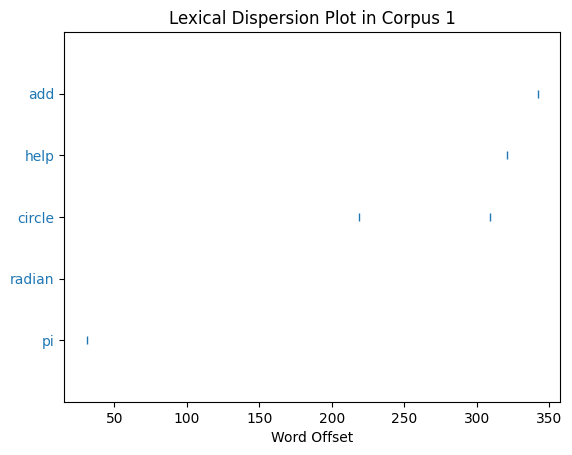

<Figure size 1200x400 with 0 Axes>

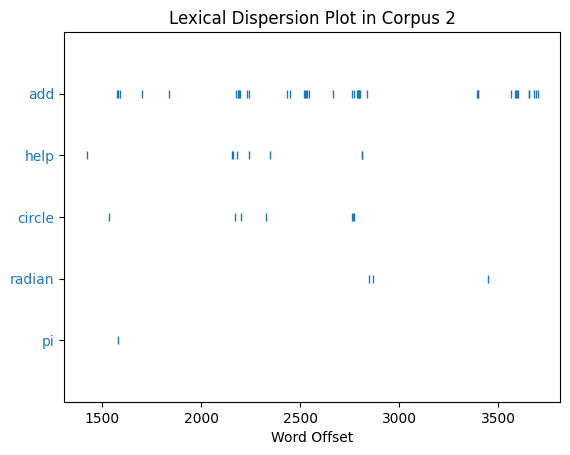

<Figure size 1200x400 with 0 Axes>

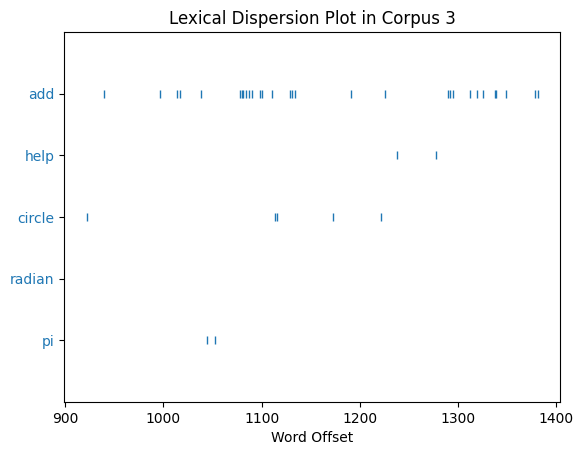

<Figure size 1200x400 with 0 Axes>

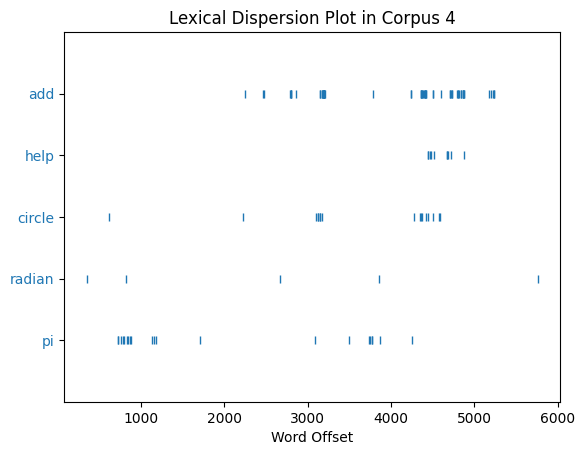

<Figure size 1200x400 with 0 Axes>

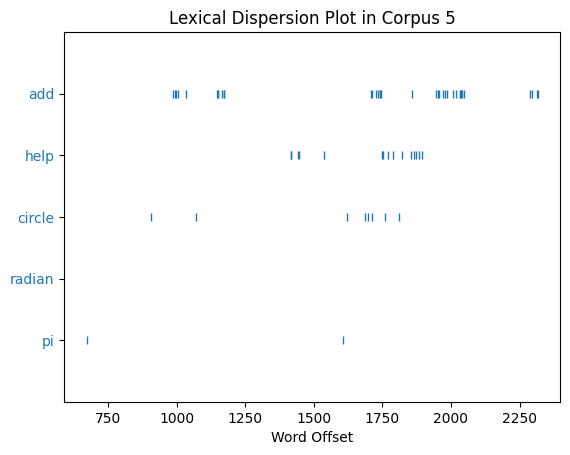

<Figure size 1200x400 with 0 Axes>

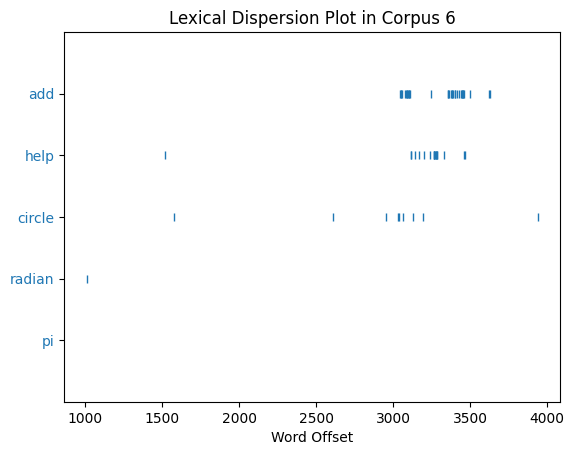

<Figure size 1200x400 with 0 Axes>

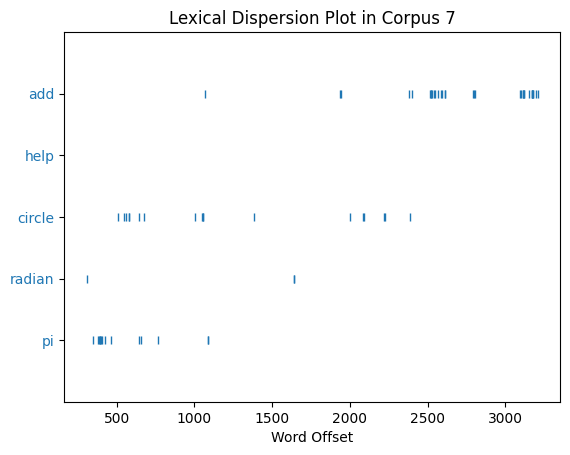

In [39]:
import nltk
import matplotlib.pyplot as plt
from nltk.text import Text

# List of words to examine
target_words = ['pi', 'radian', 'circle', 'help', 'add']  # Modify this list as needed

# Generate dispersion plot for each text corpus
plt.figure(figsize=(12, 4))
text_objects_corpus1.dispersion_plot(target_words)
plt.title("Lexical Dispersion Plot in Corpus 1")
plt.show()

plt.figure(figsize=(12, 4))
text_objects_corpus2.dispersion_plot(target_words)
plt.title("Lexical Dispersion Plot in Corpus 2")
plt.show()

plt.figure(figsize=(12, 4))
text_objects_corpus3.dispersion_plot(target_words)
plt.title("Lexical Dispersion Plot in Corpus 3")
plt.show()

plt.figure(figsize=(12, 4))
text_objects_corpus4.dispersion_plot(target_words)
plt.title("Lexical Dispersion Plot in Corpus 4")
plt.show()

plt.figure(figsize=(12, 4))
text_objects_corpus5.dispersion_plot(target_words)
plt.title("Lexical Dispersion Plot in Corpus 5")
plt.show()

plt.figure(figsize=(12, 4))
text_objects_corpus6.dispersion_plot(target_words)
plt.title("Lexical Dispersion Plot in Corpus 6")
plt.show()

plt.figure(figsize=(12, 4))
text_objects_corpus7.dispersion_plot(target_words)
plt.title("Lexical Dispersion Plot in Corpus 7")
plt.show()

NLTK Text Objects

In [37]:
import nltk
nltk.download('stopwords')

print(text_objects_corpus1.collocations())
print(text_objects_corpus2.collocations())
print(text_objects_corpus3.collocations())
print(text_objects_corpus4.collocations())
print(text_objects_corpus5.collocations())
print(text_objects_corpus6.collocations())
print(text_objects_corpus7.collocations())

spring break; decimal places; fake quiz; early yesterday; two decimal;
little bit; knew part; wanted figure; went prom; negative know; since
know; sure going; taking quiz; one see; kim going; weekend going;
sleep like; like dress; like next; going like
None
bye bye; sorry sorry; wimp wimp; good job; extra part; giving giving;
let see; high dive; rahman emmanuel; one radius; back side; find
proportion; making fun; meryl meryl; life model; life motto; walk
around; justin timberlake; radius fits; proportion one
None
know know; last year; first time; eight bounces; king hill; pay
attention; flappy golf; joint team; done unit; add third; science
part; third bottom; way gon; harder thought; summer break; says exact;
tomorrow thursday; grade school; might want; done yet
None
know know; thank thank; little bit; sorry sorry; plus plus; inverse
cosine; change stats; lone ranger; never mind; half period; one one;
muscular dystrophy; web servers; bit difficult; gym gon; make sense;
degrees radians

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# TFA Concordance

In [38]:
print(text_objects_corpus1.concordance("pi"))
print(text_objects_corpus2.concordance("pi"))
print(text_objects_corpus3.concordance("pi"))
print(text_objects_corpus4.concordance("pi"))
print(text_objects_corpus5.concordance("pi"))
print(text_objects_corpus6.concordance("pi"))
print(text_objects_corpus7.concordance("pi"))

Displaying 1 of 1 matches:
nk thing divide anyone different form pi equal x wanted figure radians angle r
None
Displaying 25 of 42 matches:
adius normally learned diameter times pi circumference two radius case means p
i circumference two radius case means pi add diameter going times since dividi
nce dividing diameter two going twice pi yeah still go around understand yes s
h think got wait derive get well mean pi know find sorry wait confused well fi
d got oh yeah looking extra part mean pi know put still understand b find prop
 every time approximately exactly got pi oh always going angle radian approxim
 radian approximately got exactly say pi pi divided pi yeah divided pi makes s
dian approximately got exactly say pi pi divided pi yeah divided pi makes sens
imately got exactly say pi pi divided pi yeah divided pi makes sense yeah look
tly say pi pi divided pi yeah divided pi makes sense yeah look circle radius w
re know says exact radians mean leave pi yeah go cool right cool think

Sentiment Analysis

Unsupervised Analysis

Topic Modeling

K-Means

LDA